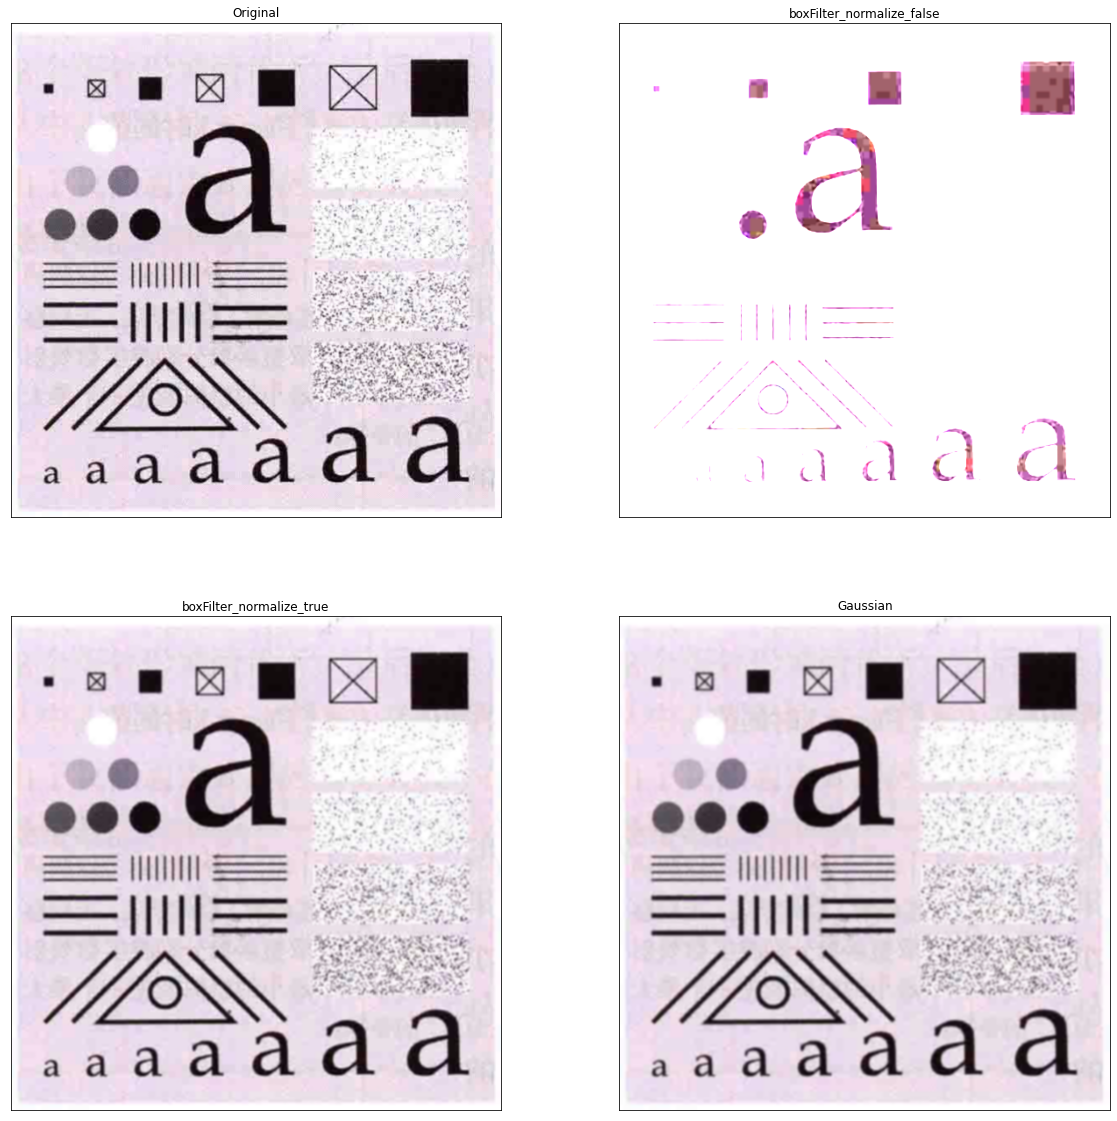

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('test.png')

blur1 = cv.boxFilter(img, -1 ,(3,3),normalize = False)
blur2 = cv.boxFilter(img, -1 ,(3,3),normalize = True)
blur3 = cv.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(20,20)) #设置窗口大小

plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(blur1),plt.title('boxFilter_normalize_false')
plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(blur2),plt.title('boxFilter_normalize_true')
plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(blur3),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])

plt.show()

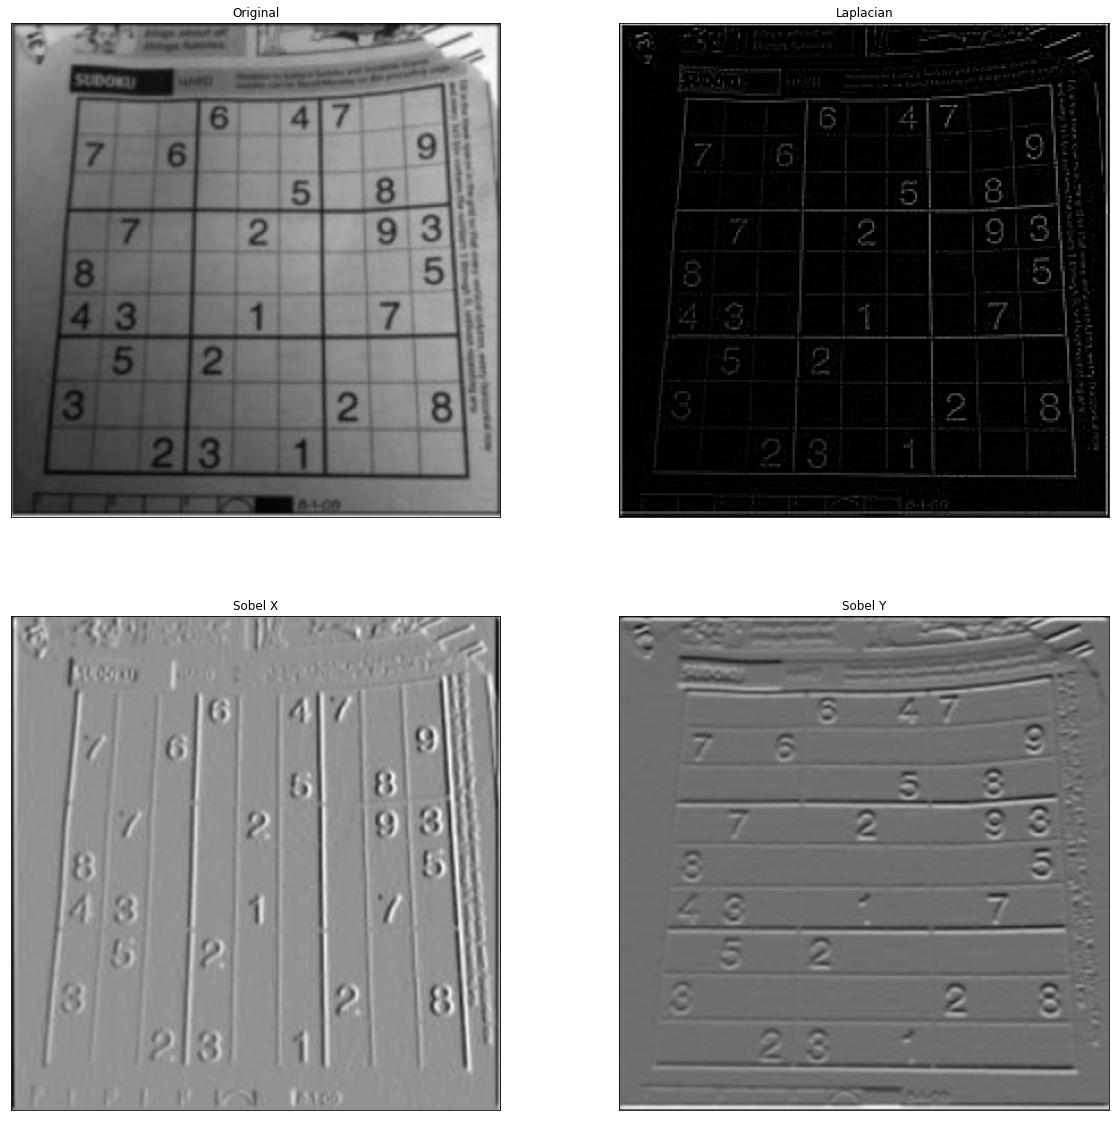

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('test3.png', 0) #以灰度图方式读取图像
plt.figure(figsize=(20,20)) #设置窗口大小

laplacian = cv.Laplacian(img ,cv.CV_8U)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
import cv2
import copy
from PIL import Image
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
hat_bgr = cv2.imread("/Users/zhanghonggao/Desktop/2021_algorithm_intern_information/6-computer_vision/应用案例/images/10242.png") # 图像需为PNG格式（方便alpha通道的使用）
print(hat_bgr.shape)
r, g, b = cv2.split(hat_bgr)
hat_rgb = cv2.merge((r, g, b)) # 把 rgb 三通道合成一张rgb的彩色图, shape is (height, width, channel)

# 帽子放在头顶上，因为帽子尺寸和人脸ROI尺寸不一样，为了视觉效果好
# 需要将帽子宽度缩放到人脸一样宽，对应的帽子高度也需要乘上这个缩放比例
def image_blending(image1, x,y,w,h, hat):
    scaled_factor = w/hat.shape[1]
    resized_hat_h = int(round(hat.shape[0] * scaled_factor))
    resized_hat_w = w
    
    bg_roi = image1[y - resized_hat_h : y, x : x + w] # # 原图 ROI 中提取放 LOGO 的区域
    hat = cv2.resize(hat, (bg_roi.shape[1], bg_roi.shape[0])) # 将帽子大小缩放到和 bg_roi 一样的尺寸
    
    #add_hat = cv2.add(bg_roi, hat) # 两个ROI区域相加, 等效于 add_hat = bg_roi + hat
    add_hat = cv2.addWeighted(bg_roi,0.5, hat,0.5,0) # 两个 ROI 区域的混合，等效于dst=α⋅src1+β⋅src2+γ
    image1[y - resized_hat_h: y, x : x + w] = hat # 原图中需要放置标志的区域重新赋值
    
    return image1

if __name__ == "__main__":
    img = cv2.imread("/Users/zhanghonggao/Desktop/2021_algorithm_intern_information/6-computer_vision/应用案例/images/programmer.png") # 必须为 png 图片
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
    faces = face_cascade.detectMultiScale(gray, 1.4, 5) # Detect the faces
    
    for (x, y, w, h) in faces:
        center = int(x + w/2)
        print(x,y,w,h)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) # visual face detect bbox
        output_image = image_blending(img, x, y, w, h, hat_bgr)
        
    cv2.imshow("hat_on_face", output_image)
    cv2.imwrite('/Users/zhanghonggao/Desktop/2021_algorithm_intern_information/6-computer_vision/应用案例/images/hat_on_head_add.png', output_image)

(862, 1264, 3)
739 276 253 253


(92, 253, 3) (92, 253, 3)


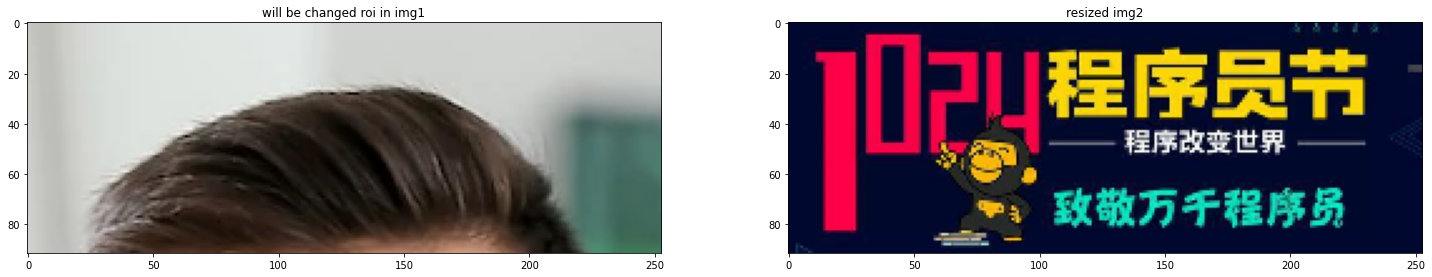

In [203]:
import cv2
import matplotlib.pyplot as plt

def plt_show_one(img1, title="fist image"):
    plt.figure('img1 roi',figsize=(25,25))
    plt.title(title)
    plt.imshow(cv2.cv2tColor(img1,cv2.COLOR_BGR2RGB))

def plt_show_two(img1, img2, title1="fist image", title2="second image"):
    plt.figure('img2 BINARY',figsize=(25,25))
    plt.subplot(121)
    plt.title(title1)
    plt.imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.title(title2)
    plt.imshow(cv.cvtColor(img2,cv.COLOR_BGR2RGB))

# Load two images
img1 = cv.imread('./programmer.png') # shape is (h, w, c): (1200, 1800, 3)
img2 = cv.imread('./10246.png') # shape is (862, 1264, 3)
thresh_set = 45

x, y, w, h = 739, 276, 253, 253 # 人脸 box 信息

# 1, 将标志图像缩放到合适尺寸，并以此在原图上创建 ROI，同时将标志图像缩放，并显示
# I want put img2 on img1's roi, So I create roi
scaled_factor = w/img2.shape[1]
resized_hat_h = int(round(img2.shape[0] * scaled_factor))
img1_roi = img1[y - resized_hat_h : y, x : x + w] # 原ROI中提取放LOGO的区域, roi shape is (173, 253, 3)
img2_resized = cv.resize(img2, (img1_roi.shape[1], img1_roi.shape[0])) # 将img2缩放到roi一样大小
print(img1_roi.shape, img2_resized.shape)

plt_show_two(img1_roi, img2_resized, "will be changed roi in img1", "resized img2")

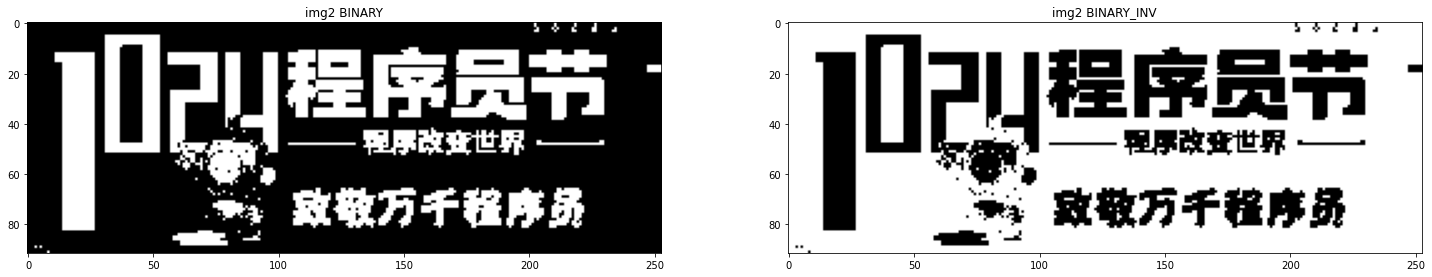

In [204]:
# 2，创建标志图像的mask和mask_inv图像, 并显示
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2_resized, cv.COLOR_BGR2GRAY)
# 80是img2背景的最大像素值
ret, img2_mask = cv.threshold(img2gray, thresh_set, 255,  cv.THRESH_BINARY) # 像素灰度值大于80的取值255，反之取0
ret, img2_mask_inv = cv.threshold(img2gray, thresh_set, 255, cv.THRESH_BINARY_INV) # 像素灰度值小于80的取值255，反之取0
plt_show_two(img2_mask, img2_mask_inv, "img2 BINARY", "img2 BINARY_INV") # 显示图像

In [205]:
# Masking（掩膜运算） 即图与掩膜的“按位与”运算: 原图中的每个像素和掩膜（Mask）中的每个对应像素进行按位与运算，
# 如果为真，结果是原图的值【这是重点】；如果为假，结果就是零
# mask的最大作用：让我们只关注我们感兴趣的图像部分。如下引用选自《Practical Python and OpenCV 3rd Edition》

(92, 253) (92, 253, 3)


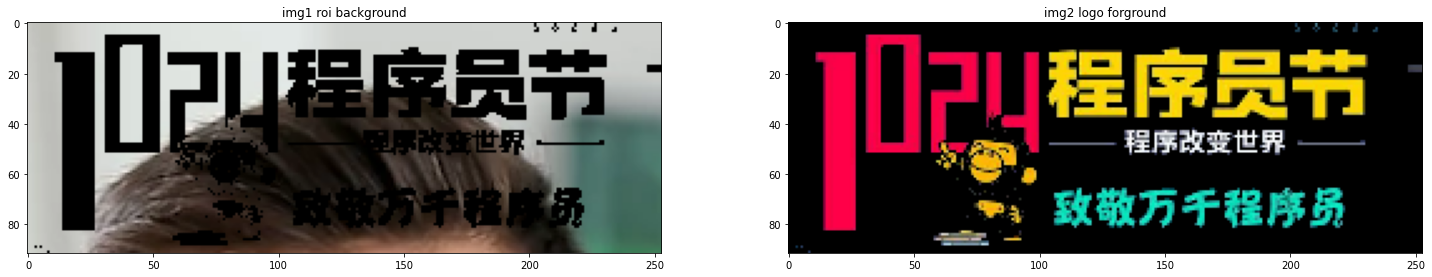

In [206]:
# 3，black-out the area of logo in ROI，and Take only region of logo from logo image, 并显示
print(img2_mask_inv.shape, img1_roi.shape)
img1_bg = cv.bitwise_and(img1_roi, img1_roi, mask = img2_mask_inv) # img1_roi和img1_roi先按位与操作AND，结果还是img1_roi, 再将结果进行mask操作
img2_fg = cv.bitwise_and(img2_resized, img2_resized, mask = img2_mask) # 把前景以外的地方的像素置为0，即扣出LOGO
# img2_fg[:,:,0] = 255
# background 背景, foreground 前景
plt_show_two(img1_bg, img2_fg, "img1 roi background", "img2 logo forground") # 显示图像

True

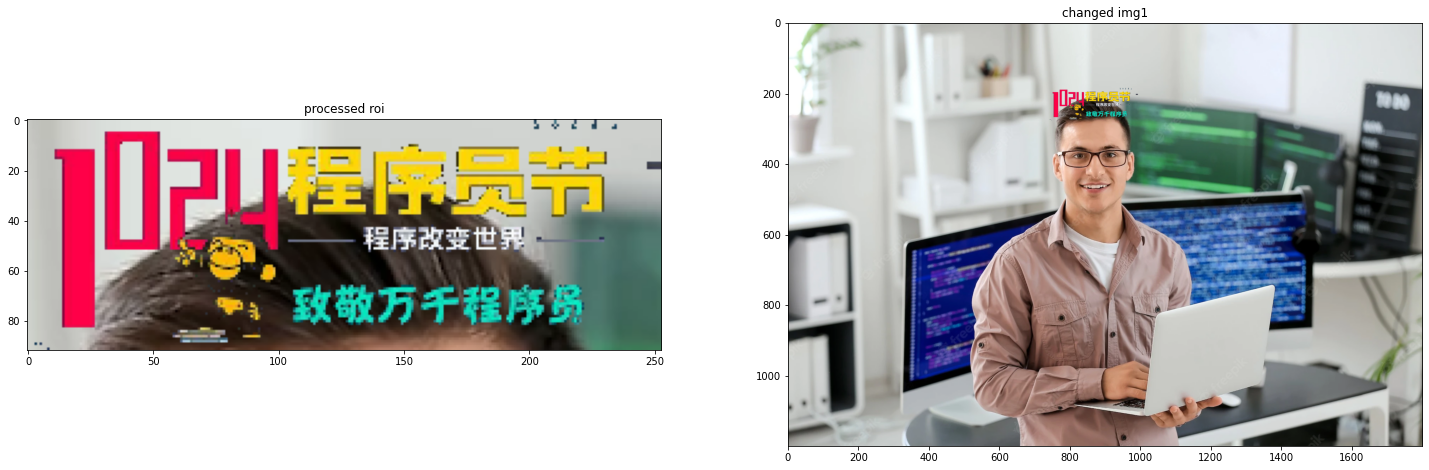

In [207]:
# 4, Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)

img1[y - resized_hat_h : y, x : x + w] = dst
plt_show_two(dst, img1, "processed roi", "changed img1") # 显示图像
cv2.imwrite('hat_on_head_add.png', img1)